# Situación problema

# Introducción

Este estudio se hará sobre la Tasa de suicidios de 1985 a 2016 específicamente en la región de Latinoamérica. El conjunto de datos fue extraído de otros cuatro conjuntos vinculados por tiempo y lugar y fue confeccionado para encontrar señales correlacionadas con el aumento de tasas de suicidios en diferentes cohortes a nivel mundial, en todo el aspecto socioeconómico.

Cabe destacar que los datos fueron recopilados a raíz de organizaciones como la ONU (UN), OMS (WHO), y Banco Mundial (World Bank).

# Variables

Las variables que contiene la base de datos son las siguientes:

- Country: país donde se sucedieron las autolesiones.
- Year: año en el que acontecieron las autolesiones.
- Sex: sexo de la víctima.
- Age: edad de la víctica.
- Suicides_no: cantidad de suicidios registrados.
- Population: cantidad de personas registradas dentro del espectro de edad.
- Suicides/100k pop: índice de suicidios entre 100 mil personas.
- Country-year: registro de país y año en donde sucedieron los acontecimientos.
- HDI for year: corresponde al Human Development Index del año.
- GDP_FOR_YEAR: Corresponde al producto interno bruto del país de ese año.
- GDP_PER_CAPITA: Corresponde al producto interno bruto per cápita de ese año.
- Generation: Generación a la que correspondían las víctimas.

En este estudio en particular se estarán empleando como variables críticas, el país (variable categórica), año (variable categórica), sexo (variable categórica), edad (variable categórica), cantidad de suicidios (variable numérica), suicidios entre 100,000 habitantes (variable numérica), GDP y GDP per cápita (variables numéricas).


# Instalación e importación de librerías (Ignorar)

In [1]:
pip install pandas

     |████████████████████████████████| 11.3 MB 4.5 MB/s            
     |████████████████████████████████| 15.7 MB 61.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.5 MB/s            
     |████████████████████████████████| 38.1 MB 60.8 MB/s            
     |████████████████████████████████| 11.2 MB 31.3 MB/s            █████████████████████████▌ | 10.7 MB 31.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 53.0 MB/s            
     |████████████████████████████████| 880 kB 46.2 MB/s            
     |████████████████████████████████| 3.1 MB 42.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

     |████████████████████████████████| 96 kB 1.2 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [7]:
df=pd.read_csv('basededatossituacionproblemabuenacuatro.csv')

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (45,47,49,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Pregunta de investigación 1: ¿Cuál es el rango de edad de suicidio más común en Latinoamérica?

<AxesSubplot:>

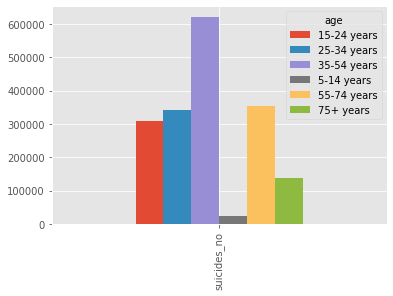

In [100]:
pivot_common=pd.pivot_table(df,
                            values='suicides_no',
                            columns='age',
                            aggfunc='sum'
                           ).plot(kind='bar')
pivot_common

Como puede observarse, la población de mayor riesgo de suicidarse en Latinoamérica son aquellos que se encuentran en la edad entre los 35 y 54 años: seguido de 55-74, posteriormente de 25-34, luego de 15-24, prosiguiendo de más de 75 años y finalmente de 5-14 años.

# Pregunta de investigación 2: ¿Cuál es la distribución de suicidios entre hombres y mujeres?

In [9]:
pivot_gender=pd.pivot_table(df,
                            values='suicides_no',
                            columns='sex',
                            aggfunc='sum'
                           )
pivot_gender      


sex,female,male
suicides_no,375179.0,1410162.0


Text(0.5, 1.0, 'Porcentaje de suicidios entre hombres y mujeres')

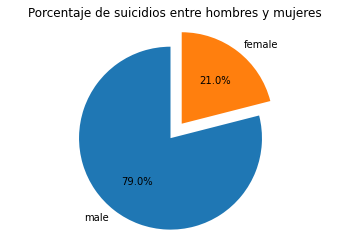

In [10]:
labels=['male','female']
sizes=[1410162,375179]
explode=[0.1,0.1]
fig,ax=plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
autopct='%1.1f%%',
shadow=False,
startangle=90)
ax.axis('equal')
ax.set_title('Porcentaje de suicidios entre hombres y mujeres')

Como podemos observar, el porcentaje de suicidios de hombres es considerablemente más alto que el de mujeres, siendo casi del 80%.

# Pregunta de investigación 3: ¿Cuál es la distribución de suicidios por generación?

In [11]:
pivot_generations=pd.pivot_table(df,
                                 index='generation',
                                 values='suicides_no',
                                 aggfunc='sum')
pivot_generations

,suicides_no
generation,
Boomers,573423.0
G.I. Generation,124583.0
Generation X,474053.0
Generation Z,8502.0
Millenials,240278.0
Silent,364502.0


Text(0.5, 1.0, 'Distribución de suicidios por generación')

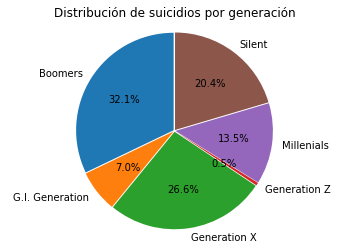

In [12]:
labels=['Boomers','G.I. Generation','Generation X', 'Generation Z','Millenials','Silent']
sizes=[573423,124583,474053,8502,240278,364502]
explode=(0.01,0.01,0.01,0.01,0.01,0.01)
fig,ax=plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=False,
       startangle=90)
ax.axis('equal')
ax.set_title('Distribución de suicidios por generación')

Como se puede observar en la gráfica de pastel, es la generación Boomer la que ha contado con mayor cantidad de suicidios de 1986 a 2016, representando un 32.1% de la cantidad total, correspondiente a 573423 muertes.

# Pregunta de investigación 4: En los 5 países con mayor índice de suicidios en Latinoamérica ¿Existe alguna correlación entre el índice de suicidios y el GDP?

In [91]:
pivcienmil= pd.pivot_table(df,
                           index='year',
                           values= 'suicides/100k pop',
                           columns=['country'],
                           aggfunc= 'mean'
                          )
pivcienmil.head(2)

country,Argentina,Bahamas,Barbados,Belize,Brazil,Canada,Chile,Colombia,Costa Rica,Cuba,...,Nicaragua,Panama,Paraguay,Puerto Rico,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and Grenadines,Trinidad and Tobago,United States,Uruguay
year,,,,,,,,,,,,,,,,,,,,,
1985.0,11.205833,0.396667,5.143333,NaN,4.931667,13.871667,9.075833,5.213333,5.788333,NaN,...,NaN,4.255000,3.285,12.884167,NaN,NaN,2.7325,2.514167,15.393333,14.884167
1986.0,12.741667,NaN,3.060833,1.614167,4.763333,15.842500,7.578333,4.175833,7.486667,NaN,...,NaN,5.075833,2.230,14.852500,NaN,4.995833,0.0000,10.260833,15.970833,14.372500


Uruguay

<AxesSubplot:title={'center':'GDP vs índice CUBA'}, xlabel='indexcuba', ylabel='GDPCuba'>

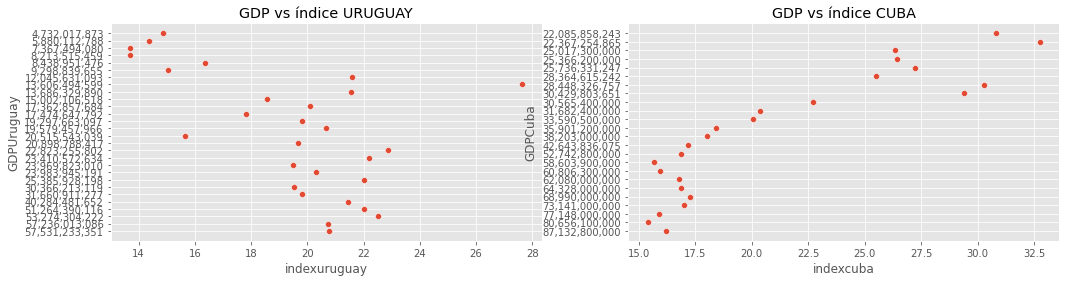

In [94]:
plt.figure(figsize=(17,4))

plt.subplot(1,2,1)
plt.title('GDP vs índice URUGUAY')
sns.scatterplot(x='indexuruguay', y='GDPUruguay', data=df)

plt.subplot(1,2,2)
plt.title('GDP vs índice CUBA')
sns.scatterplot(x='indexcuba', y='GDPCuba',data=df )

Cuba

<AxesSubplot:title={'center':'GDP vs índice CHILE'}, xlabel='indexchile', ylabel='GDPChile'>

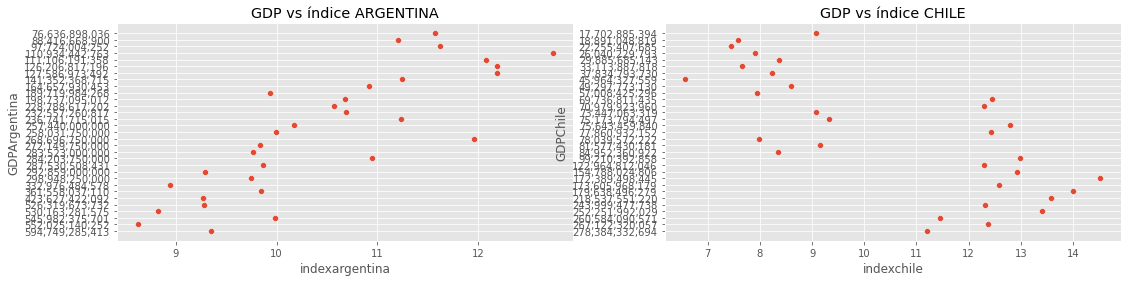

In [95]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.title('GDP vs índice ARGENTINA')
sns.scatterplot(x='indexargentina',y='GDPArgentina', data=df)

plt.subplot(1,2,2)
plt.title('GDP vs índice CHILE')
sns.scatterplot(x='indexchile',y='GDPChile', data=df)

Argentina

<AxesSubplot:title={'center':'GDP vs índice EL SALVADOR'}, xlabel='indexelsalvador', ylabel='GDPSalvador'>

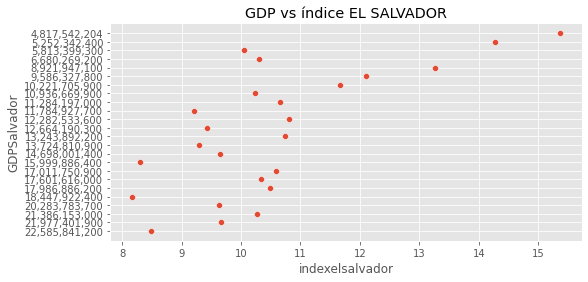

In [96]:
plt.figure(figsize=(8.45,4))
plt.title('GDP vs índice EL SALVADOR')
sns.scatterplot(x='indexelsalvador', y='GDPSalvador',data=df)

En el caso de Uruguay y Chile, mientras va incrementando el GDP, el índice muestra un comportamiento directamente proporcional, por lo que incrementa igualmente.
Caso contrario con Argentina, Cuba y El Salvador , mientras incrementa el Producto Interno Bruto de la nación, el índice de suicidios va decrementando.


# Pregunta de investigación 5: En los 5 países con mayor índice de suicidios en Latinoamérica ¿Existe una correlación entre el índice de suicidios y el GPD per cápita?

Uruguay

(array([12.5, 15. , 17.5, 20. , 22.5, 25. , 27.5, 30. , 32.5, 35. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

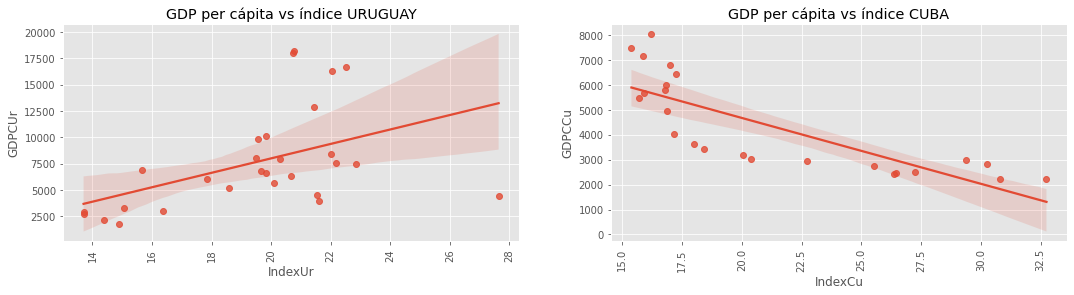

In [97]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title('GDP per cápita vs índice URUGUAY')
sns.regplot(x='IndexUr',y='GDPCUr',data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('GDP per cápita vs índice CUBA')
sns.regplot(x='IndexCu',y='GDPCCu',data=df)
plt.xticks(rotation=90)

Cuba

(array([ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

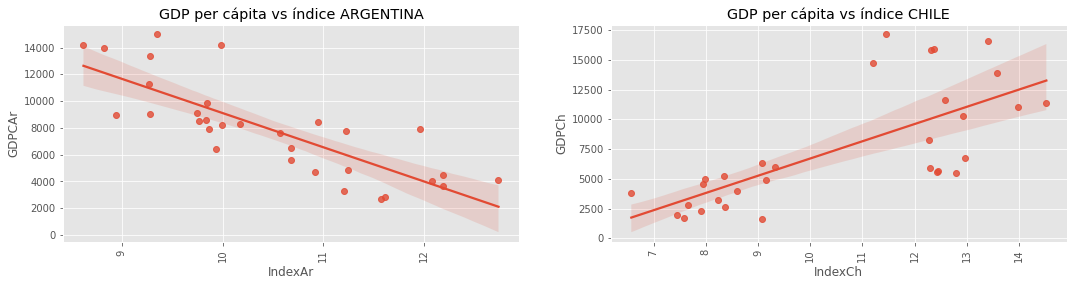

In [98]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title('GDP per cápita vs índice ARGENTINA')
sns.regplot(x='IndexAr',y='GDPCAr',data=df)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('GDP per cápita vs índice CHILE')
sns.regplot(x='IndexCh',y='GDPCh',data=df)
plt.xticks(rotation=90)

Argentina

<AxesSubplot:title={'center':'GDP per cápita vs índice EL SALVADOR'}, xlabel='IndexSa', ylabel='GDPSa'>

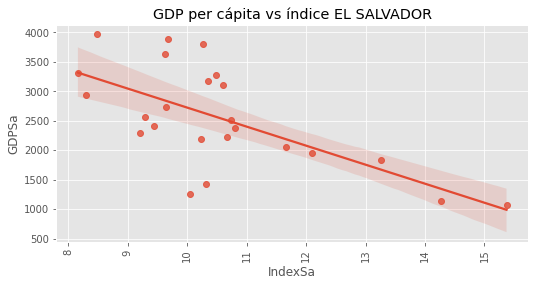

In [99]:
plt.figure(figsize=(8.45,4))
plt.xticks(rotation=90)
plt.title('GDP per cápita vs índice EL SALVADOR')

sns.regplot(x='IndexSa', y='GDPSa',data=df)

Al igual que en la previa pregunta de investigación, tanto Chile como Uruguay tienen mayor índice de muertes a pesar de que su Producto Interno Bruto per Cápita incrementa, mientras que en Argentina, El Salvador y Cuba el índice de muertes es mayor mientras el Producto Interno Bruto sea más bajo.

# Pregunta de investigación número 6: ¿Cuál es el comportamiento de los índices de los primeros 5 países con mayor coeficiente?

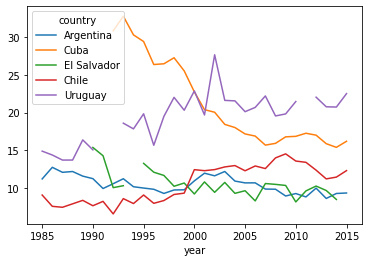

In [24]:
pivcienmil[['Argentina','Cuba','El Salvador','Chile','Uruguay']].plot(kind='line')
mpl.style.use('ggplot')




Como puede observarse en la gráfica, los datos son bastante volátiles, pero en países como Cuba, o inculsive El Salvador, está decrementando el índice de suicidios, mientras que en Chile, y sobretodo Uruguay el índice de suicidios está creciendo conforme pasan los años. En cuanto a Argentina, sus coeficientes oscilan entre 12 y 8 suicidios por cada 100,000 personas.